In [1]:
'''

application of calculate ocean heat budget II

'''

'\n\napplication of calculate ocean heat budget II\n\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from scipy.interpolate import interp2d, NearestNDInterpolator

In [3]:
import os
os.getcwd()

%cd /g/data/p66/ars599/EAE_Lecture

/g/data/p66/ars599/EAE_Lecture


# Calculate horizontal advection

## 3) Grid info

In [4]:
idir = '/g/data/p66/ars599/work_eae/'
filenames = [idir+'uo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'vo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'wo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'thetao_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc']

file_list = []

for filename in filenames:
    ds = xr.open_dataset(filename)
    file_list.append(ds)

ds = file_list[0]
ds

<xarray.Dataset>
Dimensions:         (time: 120, bnds: 2, j: 99, i: 161, vertices: 4, lev: 11)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T...
    longitude       (j, i) float64 ...
    latitude        (j, i) float64 ...
  * i               (i) float64 39.0 40.0 41.0 42.0 ... 196.0 197.0 198.0 199.0
  * j               (j) float64 87.0 88.0 89.0 90.0 ... 182.0 183.0 184.0 185.0
  * lev             (lev) float64 5.0 15.0 25.0 35.0 ... 75.0 85.0 95.0 105.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    longitude_bnds  (j, i, vertices) float64 ...
    latitude_bnds   (j, i, vertices) float64 ...
    lev_bnds        (lev, bnds) float64 ...
    uo              (time, lev, j, i) float32 ...
Attributes: (12/48)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r5i1p1f1
    version:                v20210607
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/7e3c3fb7-de8c-4efa-b274-9712d36b1cb7
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

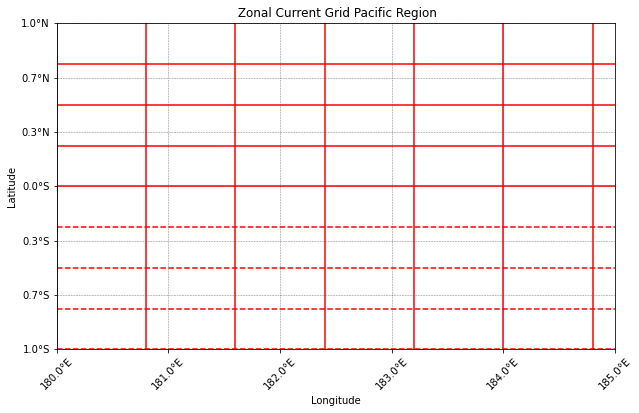

In [5]:
# Assuming your dataset is named ds
ds = file_list[0]

# Assuming uo is the uo variable from your xarray.Dataset (ds)
uo = ds.uo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

uo_lon = uo.longitude
uo_lat = uo.latitude
uo_pac = uo[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
uo_lon_pac = uo_lon[lat_indices, lon_indices]
uo_lat_pac = uo_lat[lat_indices, lon_indices]
plt.figure(figsize=(10, 6))

plt.contour(uo_pac.longitude, uo_pac.latitude, uo_lon_pac, colors='red')
plt.contour(uo_pac.longitude, uo_pac.latitude, uo_lat_pac, colors='red')
plt.title(' Zonal Current Grid Pacific Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
lon_ticks = uo_pac.longitude[0, :].values  # Convert to regular numpy array
lon_labels = [f'{float(lon):.1f}°E' for lon in lon_ticks]
plt.xticks(uo_pac.longitude[0, :], lon_labels, rotation=45)
lat_ticks = uo_pac.latitude[:, 0].values  # Convert to regular numpy array
lat_labels = [f'{abs(lat):.1f}°S' if lat < 0 else f'{lat:.1f}°N' for lat in lat_ticks]
plt.yticks(uo_pac.latitude[:,0], lat_labels)

plt.show()

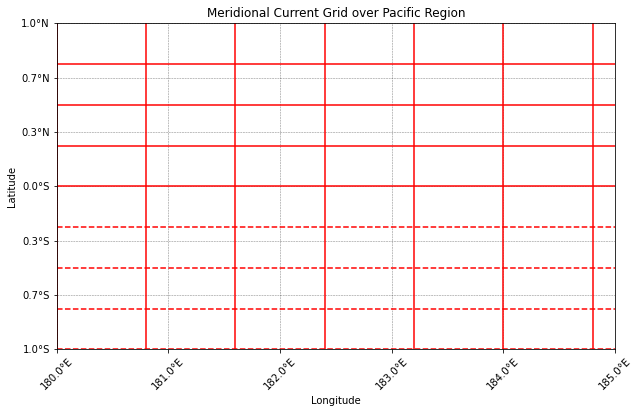

In [6]:
# Assuming your dataset is named ds
ds = file_list[1]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
vo = ds.vo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

vo_lon = vo.longitude
vo_lat = vo.latitude
vo_pac = vo[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
vo_lon_pac = vo_lon[lat_indices, lon_indices]
vo_lat_pac = vo_lat[lat_indices, lon_indices]
plt.figure(figsize=(10, 6))

plt.contour(vo_pac.longitude, vo_pac.latitude, vo_lon_pac, colors='red')
plt.contour(vo_pac.longitude, vo_pac.latitude, vo_lat_pac, colors='red')
plt.title('Meridional Current Grid over Pacific Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
lon_ticks = vo_pac.longitude[0, :].values  # Convert to regular numpy array
lon_labels = [f'{float(lon):.1f}°E' for lon in lon_ticks]
plt.xticks(vo_pac.longitude[0, :], lon_labels, rotation=45)
lat_ticks = vo_pac.latitude[:, 0].values  # Convert to regular numpy array
lat_labels = [f'{abs(lat):.1f}°S' if lat < 0 else f'{lat:.1f}°N' for lat in lat_ticks]
plt.yticks(vo_pac.latitude[:,0], lat_labels)

plt.show()

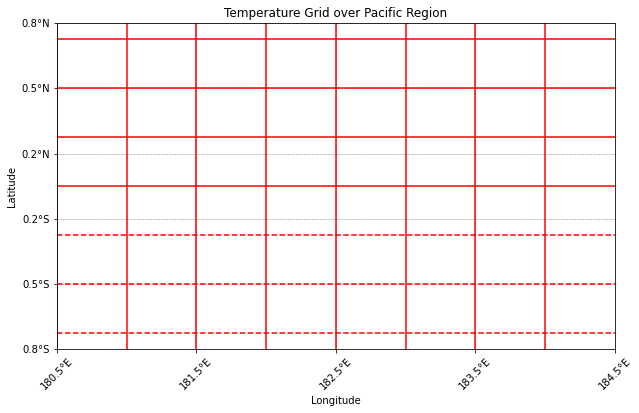

In [7]:
# Assuming your dataset is named ds
ds = file_list[3]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
theta = ds.thetao

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

theta_lon = theta.longitude
theta_lat = theta.latitude
theta_pac = theta[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
theta_lon_pac = theta_lon[lat_indices, lon_indices]
theta_lat_pac = theta_lat[lat_indices, lon_indices]
plt.figure(figsize=(10, 6))

plt.contour(theta_pac.longitude, theta_pac.latitude, theta_lon_pac, colors='r')
plt.contour(theta_pac.longitude, theta_pac.latitude, theta_lat_pac, colors='r')
plt.title('Temperature Grid over Pacific Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
lon_ticks = theta_pac.longitude[0, :].values  # Convert to regular numpy array
lon_labels = [f'{float(lon):.1f}°E' for lon in lon_ticks]
plt.xticks(theta_pac.longitude[0, :], lon_labels, rotation=45)
lat_ticks = theta_pac.latitude[:, 0].values  # Convert to regular numpy array
lat_labels = [f'{abs(lat):.1f}°S' if lat < 0 else f'{lat:.1f}°N' for lat in lat_ticks]
plt.yticks(theta_pac.latitude[:,0], lat_labels)

plt.show()

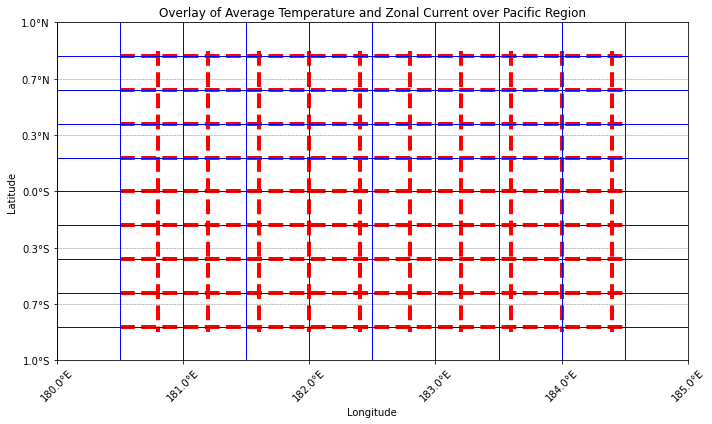

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the contour of theta_pac in red
contour_theta = ax.contour(theta_pac.longitude, theta_pac.latitude, theta_lon_pac, colors='red', levels=10, linewidths=4, linestyles='dashed')
contour_theta = ax.contour(theta_pac.longitude, theta_pac.latitude, theta_lat_pac, colors='red', levels=10, linewidths=4, linestyles='dashed')

# Plot the contour of uo_pac in blue
contour_uo = ax.contour(uo_pac.longitude, uo_pac.latitude, uo_lon_pac, colors='blue', levels=10, linewidths=1)
contour_uo = ax.contour(uo_pac.longitude, uo_pac.latitude, uo_lat_pac, colors='blue', levels=10, linewidths=1, linestyles='solid')

# Set labels and title
ax.set_title('Overlay of Average Temperature and Zonal Current over Pacific Region')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
lon_ticks = uo_pac.longitude[0, :].values
lon_labels = [f'{float(lon):.1f}°E' for lon in lon_ticks]
ax.set_xticks(uo_pac.longitude[0, :])
ax.set_xticklabels(lon_labels, rotation=45)
lat_ticks = uo_pac.latitude[:, 0].values
lat_labels = [f'{abs(lat):.1f}°S' if lat < 0 else f'{lat:.1f}°N' for lat in lat_ticks]
ax.set_yticks(uo_pac.latitude[:, 0])
ax.set_yticklabels(lat_labels)

# Show the plot
plt.tight_layout()
plt.savefig("T_U_grid.png",dpi=300)
plt.show()


### into latitude with depth

In [9]:
# Assuming your dataset is named ds
ds = file_list[3]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
theta = ds.thetao

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 100)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

theta_pac = theta[:, lev_indices, lat_indices, lon_indices].mean(['j', 'time'])
theta_pac

<xarray.DataArray 'thetao' (lev: 10, i: 5)>
array([[28.288857, 28.230013, 28.172995, 28.119598, 28.071417],
       [28.224072, 28.166117, 28.109491, 28.057264, 28.009592],
       [28.165638, 28.108984, 28.052347, 27.999403, 27.951572],
       [28.098246, 28.041632, 27.985506, 27.93116 , 27.883987],
       [28.007126, 27.94826 , 27.892258, 27.836302, 27.789352],
       [27.888756, 27.82886 , 27.772758, 27.715292, 27.66665 ],
       [27.740593, 27.683165, 27.627525, 27.570652, 27.5186  ],
       [27.5489  , 27.496267, 27.441479, 27.387068, 27.331491],
       [27.266138, 27.216696, 27.16567 , 27.113655, 27.056608],
       [26.824791, 26.774897, 26.721035, 26.667404, 26.605179]],
      dtype=float32)
Coordinates:
  * i        (i) float64 100.0 101.0 102.0 103.0 104.0
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0

In [10]:
# Assuming your dataset is named ds
ds = file_list[2]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
wo = ds.wo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 100)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

wo_pac = wo[:, lev_indices, lat_indices, lon_indices].mean(['j', 'time'])
print(wo.lev)    # array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.])
print(theta.lev) # array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])

<xarray.DataArray 'lev' (lev: 11)>
array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.])
Coordinates:
  * lev      (lev) float64 10.0 20.0 30.0 40.0 50.0 ... 80.0 90.0 100.0 110.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds
<xarray.DataArray 'lev' (lev: 11)>
array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 65.0 75.0 85.0 95.0 105.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds


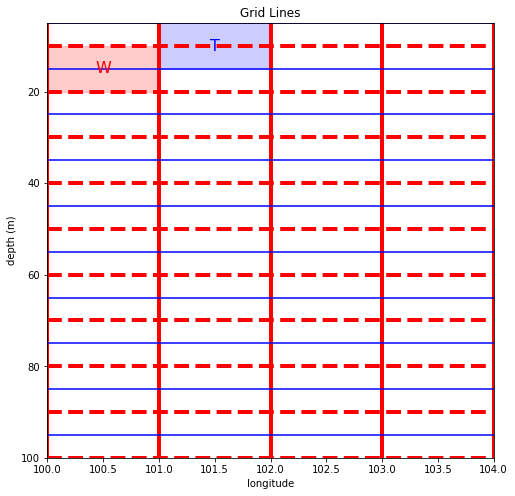

In [11]:
import matplotlib.pyplot as plt

# Assuming theta_pac and wo_pac are your xarray.DataArray objects
xt_coordinates = theta_pac.i.values
yt_coordinates = theta_pac.lev.values
xw_coordinates = wo_pac.i.values
yw_coordinates = wo_pac.lev.values

# Calculate min and max values for x and y coordinates
x_min = min(xt_coordinates.min(), xw_coordinates.min())
x_max = max(xt_coordinates.max(), xw_coordinates.max())
y_min = min(yt_coordinates.min(), yw_coordinates.min())
y_max = max(yt_coordinates.max(), yw_coordinates.max())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot vertical grid lines for 'xt' and 'xw' coordinates in red and blue
for x in xt_coordinates:
    ax.axvline(x, color='blue', linestyle='solid')
for x in xw_coordinates:
    ax.axvline(x, color='red', linestyle='solid', linewidth=4)

# Plot horizontal grid lines for 'yt' and 'yw' coordinates in red and blue
for y in yt_coordinates:
    ax.axhline(y, color='blue', linestyle='solid')
for y in yw_coordinates:
    ax.axhline(y, color='red', linestyle='dashed', linewidth=4)

# Reverse the y-axis
ax.invert_yaxis()

# Set x and y limits based on data ranges
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)  # Reverse the y-axis limits

# Shading for a specific area
ax.fill_between([100,101], 10,20, color='red', alpha=0.2)
ax.fill_between([101,102], 5,15, color='blue', alpha=0.2)

# Add text "W" inside the shaded area
ax.text((101 + 102) / 2, (5 + 15) / 2, 'T', color='blue', fontsize=16, ha='center', va='center')
ax.text((100 + 101) / 2, (10 + 20) / 2, 'W', color='red', fontsize=16, ha='center', va='center')

# Set labels and title
ax.set_xlabel('longitude')
ax.set_ylabel('depth (m)')
ax.set_title('Grid Lines')
plt.savefig("T_W_grid.png",dpi=300)
plt.show()
